## Figure 1 Code to Produce Figures

This figure will focus on the presentation of Discrete vs Continuous.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
import seaborn as sns
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = (10,10)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Panel 1B

In [ ]:
# Load the dF/F trace data
dF_trace = np.load("../Data/Session13/sessionM409828_13_dff.npy")
print("Shape of dF_trace:", dF_trace.shape)

# Extract the specified clipped section of the dF/F trace, we can play around with this
dF_trace_clipped = dF_trace[16000:16600, 1300:1600].T

# Compute the threshold for binary masking
mean_trace = np.mean(dF_trace, axis=1, keepdims=True)  # Mean across the whole trace
std_trace = np.std(dF_trace, axis=1, keepdims=True)  # Std across the whole trace
threshold = mean_trace + 2 * std_trace  # 2 stds above mean

# Apply the threshold to the clipped data
binary_trace_clipped = (dF_trace_clipped > threshold[1300:1600, :]).astype(int)

# Find colormap limits based on percentiles for better contrast
vmin = np.percentile(dF_trace_clipped, 0.1)
vmax = np.percentile(dF_trace_clipped, 99.9)

# Create and save figures
plt.figure(figsize=(4, 12))
ax = sns.heatmap(dF_trace_clipped, cmap='magma', vmin=vmin, vmax=vmax, cbar=False, yticklabels=False, xticklabels=False, linewidths=0)
# Add a black outline to the entire plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(8)  # Adjust thickness
plt.savefig("dff_trace_heatmap.png", dpi=300, bbox_inches='tight')
plt.close()

plt.figure(figsize=(4, 12))
ax = sns.heatmap(binary_trace_clipped, cmap='Greys', cbar=False, yticklabels=False, xticklabels=False, linewidths=0)
# Add a black outline to the entire plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(8)  # Adjust thickness
plt.savefig("binary_dff_trace_heatmap.png", dpi=300, bbox_inches='tight')
plt.close()

["/mnt/data/dff_trace_heatmap.png", "/mnt/data/binary_dff_trace_heatmap.png"]


Shape of dF_trace: (21616, 2708)


['/mnt/data/dff_trace_heatmap.png', '/mnt/data/binary_dff_trace_heatmap.png']

### Rest

In [2]:
###################### Load in Calcium Fluoresence Data ######################
session13_fluorescence = np.load("../Data/Session13/sessionM409828_13_CALCIUM-FLUORESCENCE.npy")

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session13_fluorescence[0,:].shape[0])]
session13_fluorescence_df = pd.DataFrame(session13_fluorescence, columns = ns)
session13_fluorescence_df

n0          n1          n2          n3          n4          n5  \
0      386.614746  356.042969  364.569641  411.091553  307.887634  258.511169   
1      394.779144  321.291138  300.326233  364.549255  365.808014  276.043915   
2      430.134644  356.892334  316.089752  369.321747  357.231720  268.536591   
3      492.495636  435.140076  328.820099  450.870300  322.758728  283.486267   
4      419.968262  367.274200  324.190277  457.118439  391.038940  298.655029   
...           ...         ...         ...         ...         ...         ...   
21611  312.012756  361.765015  292.936798  479.136536  364.582458  348.525269   
21612  412.542938  353.919128  323.288300  348.898071  383.361847  344.100220   
21613  372.910217  388.861816  337.440063  453.535980  350.960876  268.740021   
21614  328.085480  415.220123  292.897522  428.899628  355.838837  375.188202   
21615  307.753235  328.992371  254.593338  430.997986  358.714813  303.693665   

               n6          n7          n8          n9  ...       n2698  \
0      321.968903  181.205994  265.892914  280.296112  ...  274.629486   
1      443.065826  276.137421  284.962494  311.085419  ...  237.430527   
2      380.504395  237.075073  292.391113  303.730865  ...  234.579224   
3      456.826660  240.693878  298.278900  312.732330  ...  312.513519   
4      425.800476  229.693817  371.756531  293.526672  ...  258.952301   
...           ...         ...         ...         ...  ...         ...   
21611  432.958282  265.899567  364.285889  276.832275  ...  265.440521   
21612  437.041687  193.464905  314.954651  297.092010  ...  258.959564   
21613  372.935608  239.881393  377.214508  268.052277  ...  270.972809   
21614  457.023590  239.636383  302.490509  297.914673  ...  266.925446   
21615  416.589233  235.562378  357.711700  292.943085  ...  272.903931   

            n2699       n2700       n2701       n2702       n2703       n2704  \
0      350.200104  283.980774  345.541870  244.838470  274.587616  292.187408   
1      300.656067  371.085419  369.188751  297.386108  266.207123  252.236877   
2      233.114975  375.837341  309.508606  319.197876  264.221771  299.052185   
3      288.417877  375.175171  298.330444  295.929596  281.991943  291.278473   
4      349.974335  346.097595  366.578918  297.467255  328.501526  309.428894   
...           ...         ...         ...         ...         ...         ...   
21611  327.389404  314.704071  284.906982  287.028564  280.412109  305.130524   
21612  406.966003  341.093964  357.600220  352.963226  278.937195  294.812195   
21613  270.036163  298.712524  378.840210  286.396790  301.706818  279.817627   
21614  329.060760  306.616821  377.095612  253.035202  261.195953  280.266388   
21615  285.688416  299.301117  362.350372  261.590118  313.702087  316.691193   

            n2705       n2706       n2707  
0      362.794220  309.516724  318.196716  
1      384.805908  253.801224  309.436493  
2      421.659119  268.491364  308.236237  
3      378.071320  384.879822  342.556366  
4      408.260315  347.325104  331.188110  
...           ...         ...         ...  
21611  442.109039  266.693573  285.021912  
21612  447.871368  294.682220  292.638519  
21613  359.911774  317.252136  257.778015  
21614  365.129639  325.545532  349.931305  
21615  277.025421  288.718750  261.545258  

[21616 rows x 2708 columns]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


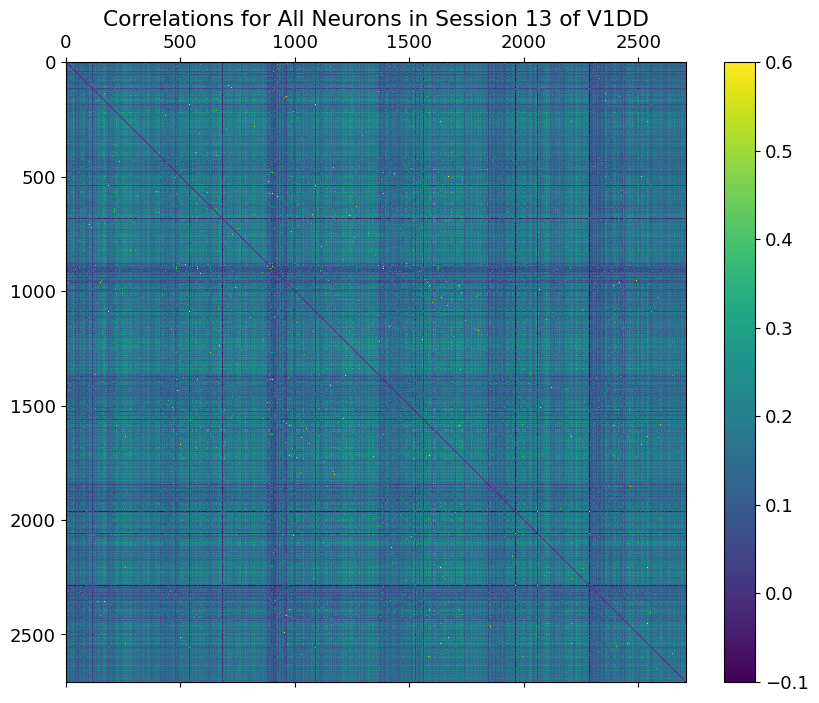

In [3]:
### Produce Correlation Matrix for Session 13 Data
corr_matrix = pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns=session13_fluorescence_df.columns)
np.fill_diagonal(corr_matrix.values, 0) # Set All Self Correlations to 0
plt.matshow(corr_matrix)
plt.title('Correlations for All Neurons in Session 13 of V1DD')
plt.clim(-0.1, 0.6)
plt.colorbar(shrink=0.8, aspect=20)
plt.savefig('Correlation_Matrix.png', dpi = 300)
plt.show()

### Hierarchical Clustering

To first compare discrete vs. continuous, we sought to exemplify clustering of neuronal data using Hierarchical Clustering

Notes From Before that are worth it to check out:
- Might be important to apply the Cophonetic Correlation to compare this dendrogram across different linkages. See if 'ward' is actually the best representation. Hard to tell with neuronal data
- As for the distances, right now we're using something simple for the dissimilarity being the inverse of the correlation. however, it might be helpful afterwards to check how this clustering does when we use the geodesic distance of the Isomap for those dissimilarities

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_44523/280794888.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = abs(linkage(dissimilarity, 'ward'))


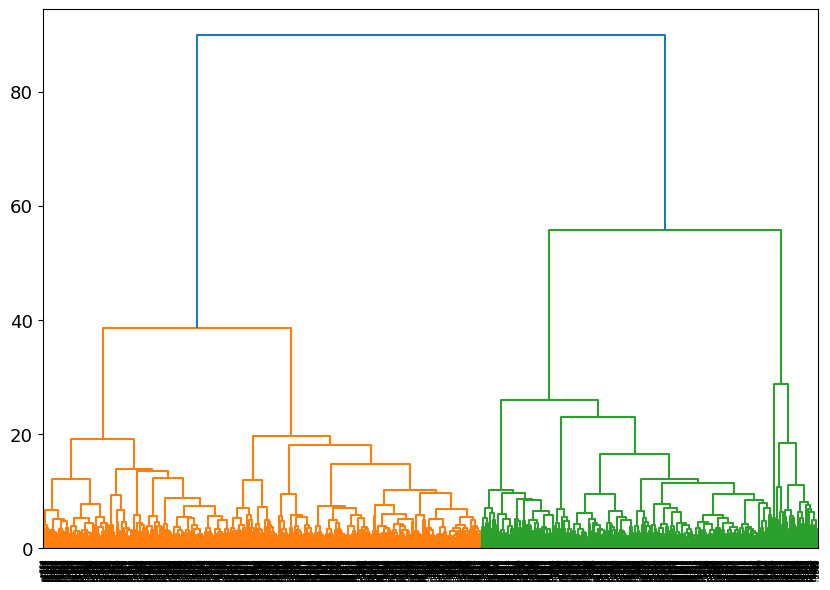

In [4]:
### Run Hierarchical Clustering Algorithm on data
plt.figure(figsize=(10,7))
corr = pd.DataFrame(np.corrcoef(session13_fluorescence_df.values, rowvar=False), columns= session13_fluorescence_df.columns)
dissimilarity = 1 - corr
# ‘complete’ linkage uses the maximum distances between all observations of the two sets
Z = abs(linkage(dissimilarity, 'ward'))

dendrogram(Z, labels= session13_fluorescence_df.columns, orientation='top', leaf_rotation=90);

In [5]:
original_dists = dissimilarity.values  # Original Disimilarity between Neurons
cophenetic_dists = squareform(cophenet(Z)) # Cophenetic Distances Between Neurons
corr_coef = np.corrcoef(original_dists, cophenetic_dists)[0,1]
corr_coef

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.9311424270543737

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


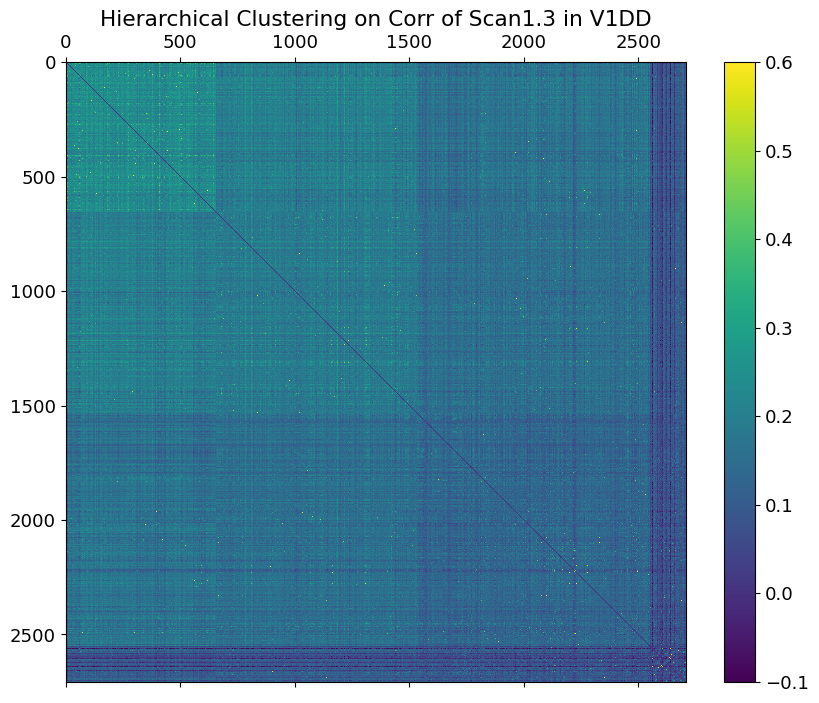

In [6]:
# Clusterize the data
threshold = 30 # Threshold of 13 produces 15 distinct clusters
labels_corr = fcluster(Z, threshold, criterion='distance') # Show the unique clusters: np.unique(labels_corr)

labels_corr_order = np.argsort(labels_corr) # Keep the indices to sort labels

# Build a new dataframe based on the sorted columns
clustered_corr = [session13_fluorescence[:,i] for i in labels_corr_order]
clustered_corr = pd.DataFrame(np.array(clustered_corr).T)
        
clustered_corr_matrix = pd.DataFrame(np.corrcoef(clustered_corr.values, rowvar=False), columns= clustered_corr.columns)
np.fill_diagonal(clustered_corr_matrix.values, 0) # Set All Self Correlations to 0     
plt.matshow(clustered_corr_matrix)
plt.title("Hierarchical Clustering on Corr of Scan1.3 in V1DD")
plt.clim(-0.1, 0.6)
plt.colorbar(shrink=0.8, aspect=20)
plt.savefig('Hierarchical_Clustering.png', dpi = 300)

In [7]:
labels_corr

array([3, 3, 4, ..., 2, 3, 1], dtype=int32)

### Continuing with Isomap

In [8]:
# open a file, where you stored the pickled data
with open("manifold_2D_on_corr_V1DD_Session13.pickle", 'rb') as f:
    # dump information to that file
    manifold_2D_on_corr_V1DD_Session_13 = pickle.load(f)

manifold_2D_on_corr_V1DD_Session_13

Component 1  Component 2
0       -0.302677    -0.457820
1        1.193673    -0.251246
2        5.388948     0.030184
3        2.155304    -0.215100
4        2.254268    -0.727503
...           ...          ...
2703     0.449029    -0.009702
2704    -0.333693    -1.035841
2705    -2.118944    -0.202800
2706     0.226652     0.097034
2707    -1.783084     0.683101

[2708 rows x 2 columns]

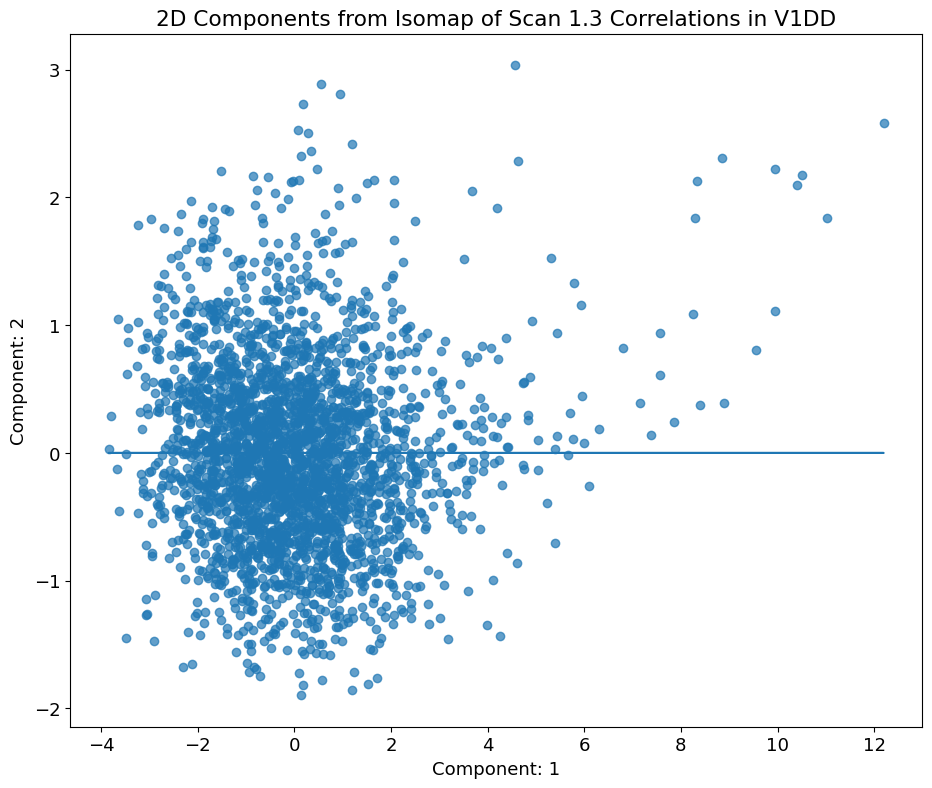

In [9]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(11,9)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Scan 1.3 Correlations in V1DD')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 2D components plot
ax.scatter(manifold_2D_on_corr_V1DD_Session_13['Component 1'], manifold_2D_on_corr_V1DD_Session_13['Component 2'], marker='o',alpha=0.7)
#fig.colorbar(mapper, orientation='vertical')

m, b = np.polyfit(manifold_2D_on_corr_V1DD_Session_13['Component 1'], manifold_2D_on_corr_V1DD_Session_13['Component 2'], 1)
plt.plot(manifold_2D_on_corr_V1DD_Session_13['Component 1'], m * manifold_2D_on_corr_V1DD_Session_13['Component 1'] + b)
plt.savefig("Isomap_Plot.png", dpi = 300)
plt.show()

In [10]:
# open a file, where you stored the pickled data
with open("plotted_corr_fluorescence_vs_isomap_V1DD_Session13.pickle", 'rb') as f:
    plotted_corr_fluorescence_vs_isomap_V1DD_Session13 = pickle.load(f)

plotted_corr_fluorescence_vs_isomap_V1DD_Session13

array([[1.62470349e+00, 6.32402581e-01, 0.00000000e+00, 1.00000000e+00],
       [6.20490168e+00, 1.69883685e-02, 0.00000000e+00, 2.00000000e+00],
       [3.13582521e+00, 1.90934089e-01, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.47465657e+00, 2.10974136e-01, 2.70500000e+03, 2.70600000e+03],
       [1.23558384e+00, 2.55747485e-01, 2.70500000e+03, 2.70700000e+03],
       [2.22702155e+00, 1.99785215e-01, 2.70600000e+03, 2.70700000e+03]])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


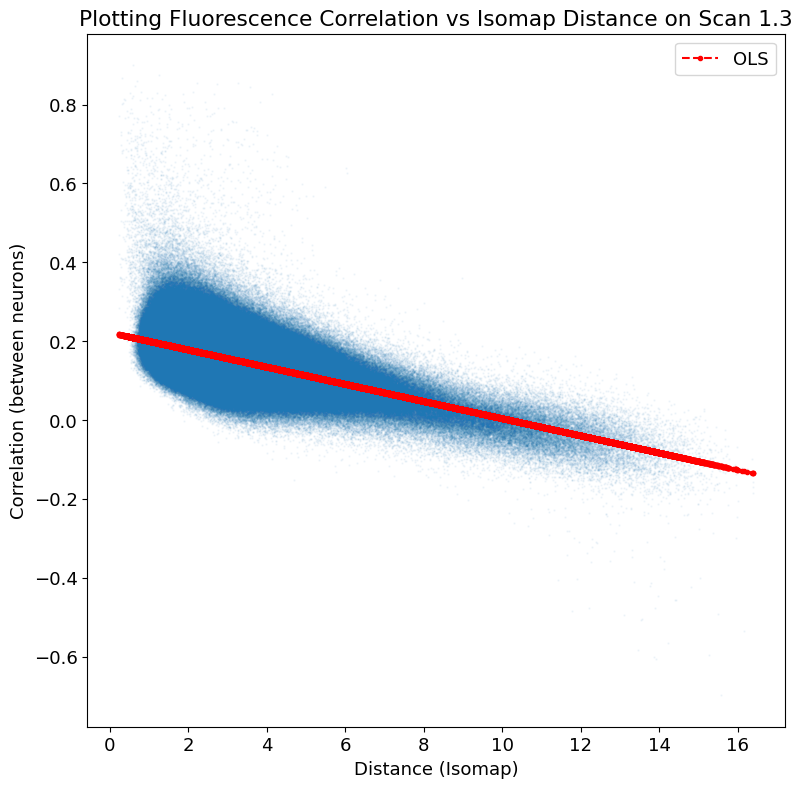

In [11]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Plotting Fluorescence Correlation vs Isomap Distance on Scan 1.3')
ax.set_xlabel('Distance (Isomap)')
ax.set_ylabel('Correlation (between neurons)')
matplotlib.rcParams['agg.path.chunksize'] = 100000

# Show 2D components plot
step = plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,0].shape[0] // 3000000 # sample 3000000 sampled points
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,1][sample]
ax.scatter(curr_sample_X, curr_sample_Y , marker='o',alpha=0.05, s = 0.5)

# Fit a linear regression
# Fit a linear regression
X_input = sm.add_constant(plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,0])
res = sm.OLS(plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,1], X_input).fit()
ax.plot(plotted_corr_fluorescence_vs_isomap_V1DD_Session13[:,0], res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.savefig("Corr_vs_Isomap", dpi = 300)
plt.show()

### Plot Correlation Matrix Using 1-D Isomap Distance

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


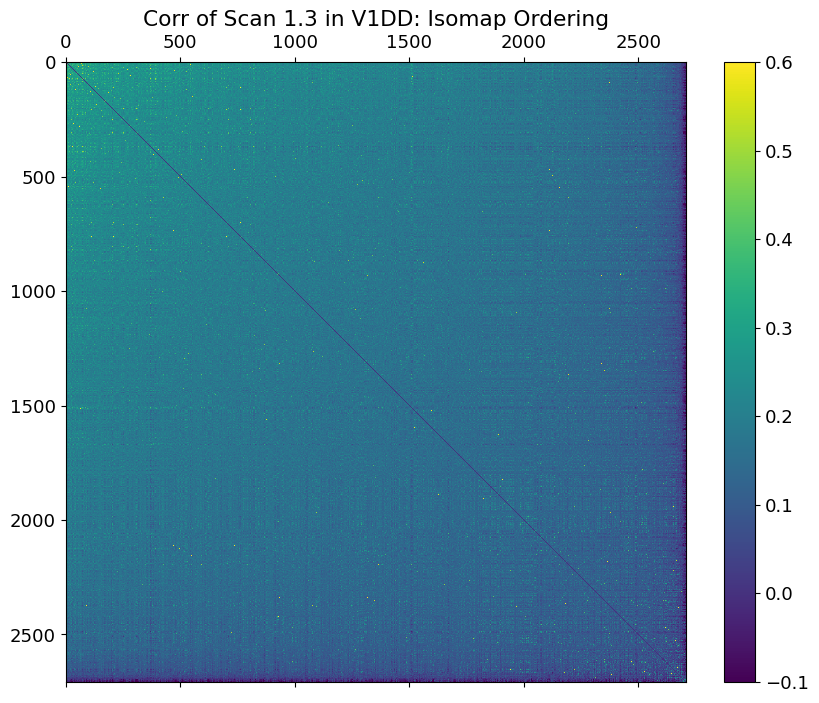

In [12]:
# Extract the first component from the 2D Isomap
first_component = manifold_2D_on_corr_V1DD_Session_13['Component 1']

# Get the sorted indices based on the first component
sorted_1D_Isomap_indices = np.argsort(first_component)

# Reorder the correlation matrix
corr_matrix = np.corrcoef(session13_fluorescence_df.values, rowvar=False)
reordered_corr_matrix = pd.DataFrame(corr_matrix[sorted_1D_Isomap_indices][:, sorted_1D_Isomap_indices], columns=session13_fluorescence_df.columns)
np.fill_diagonal(reordered_corr_matrix.values, 0) # Set All Self Correlations to 0
plt.matshow(reordered_corr_matrix)
plt.title('Corr of Scan 1.3 in V1DD: Isomap Ordering')
plt.clim(-0.1, 0.6)
plt.colorbar(shrink=0.8, aspect=20)
plt.savefig('Correlation_Matrix_1D_Isomap_Ordered.png', dpi = 300)
plt.show()

### Plot Hierarchical Clustering Using 1-D Isomap Distance

In [13]:
first_component

0      -0.302677
1       1.193673
2       5.388948
3       2.155304
4       2.254268
          ...   
2703    0.449029
2704   -0.333693
2705   -2.118944
2706    0.226652
2707   -1.783084
Name: Component 1, Length: 2708, dtype: float64

In [14]:
np.unique(labels_corr)

array([1, 2, 3, 4], dtype=int32)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


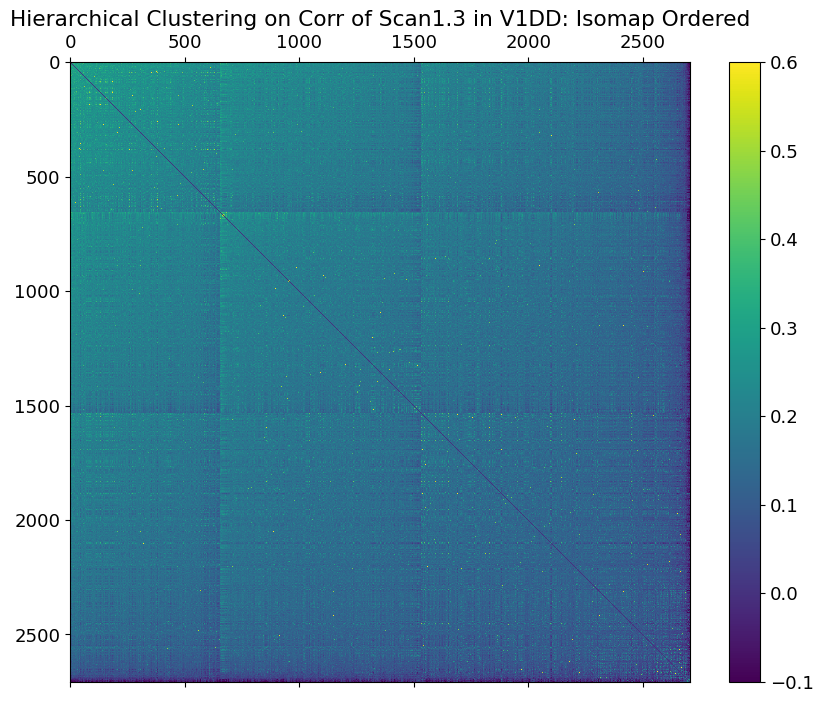

In [15]:
# Create a new array to store the reordered clustered matrix
if not isinstance(clustered_corr_matrix, np.ndarray):
    clustered_corr_matrix = clustered_corr_matrix.to_numpy()
reordered_clustered_matrix = np.zeros_like(clustered_corr_matrix)

# Get unique cluster labels (assumed to be from the clustering output)
unique_clusters = np.unique(labels_corr)

# Initialize an empty list to collect the final sorted indices
final_sorted_indices = []

# Iterate over each cluster and reorder based on the first component of Isomap
for cluster in unique_clusters:
    # Get the indices of neurons in the current cluster, sort by first Isomap Component
    cluster_indices = np.where(labels_corr == cluster)[0]
    cluster_sorted_indices = cluster_indices[np.argsort(first_component[cluster_indices])]

    # Append the sorted indices to the final list
    final_sorted_indices.extend(cluster_sorted_indices)

# Reorder the clustered correlation matrix by the sorted indices
reorder_clustered_corr = [session13_fluorescence[:,i] for i in final_sorted_indices]
reorder_clustered_corr = pd.DataFrame(np.array(reorder_clustered_corr).T)
reordered_clustered_matrix = pd.DataFrame(np.corrcoef(reorder_clustered_corr.values, rowvar=False), columns= reorder_clustered_corr.columns)

np.fill_diagonal(reordered_clustered_matrix.values, 0) # Set All Self Correlations to 0     
plt.matshow(reordered_clustered_matrix)
plt.title("Hierarchical Clustering on Corr of Scan1.3 in V1DD: Isomap Ordered")
plt.clim(-0.1, 0.6)
plt.colorbar(shrink=0.8, aspect=20)
plt.savefig('Hierarchical_Clustering_1D_Isomap_Ordered.png', dpi = 300)
